by  
Jayanth Dasari,  
Roll No: 2019BCS016


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.utils import shuffle

# **Task-1**

## **Generating Samples**

In [ ]:
mu1      = [-10,-10]
sigma1   = [[1,0],[0,1]]
samples1 = np.random.multivariate_normal(mu1, sigma1, 200)

In [ ]:
samples1.shape

(200, 2)

In [ ]:
samples1[:5]

array([[ -9.8339804 ,  -8.95902209],
       [ -9.64270592,  -9.87113638],
       [ -9.97268472, -10.28559272],
       [-11.10249731,  -9.27250063],
       [-10.40320505,  -8.89898977]])

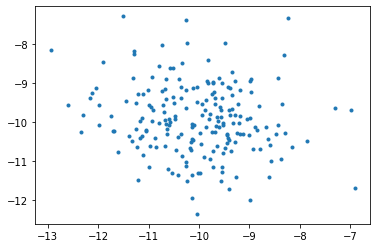

In [ ]:
plt.plot(samples1[:, 0], samples1[:, 1], '.')

In [ ]:
df1_1      = pd.DataFrame(samples1, columns=['x1','x2'])
df1_1['y'] = [1]*200
df1_1.head()

,x1,x2,y
0,-9.833980,-8.959022,1
1,-9.642706,-9.871136,1
2,-9.972685,-10.285593,1
3,-11.102497,-9.272501,1
4,-10.403205,-8.898990,1


In [ ]:
mu2      = [10,10]
sigma2   = [[1,0],[0,1]]
samples2 = np.random.multivariate_normal(mu2, sigma2, 200)

In [ ]:
samples2.shape

(200, 2)

In [ ]:
samples2[:5]

array([[ 9.51700541,  8.83716979],
       [ 9.57193665, 11.47900322],
       [11.92335096,  8.55595876],
       [10.58240666,  9.85018288],
       [ 8.53905766, 11.312099  ]])

In [ ]:
df1_2 = pd.DataFrame(samples2, columns=['x1','x2'])
df1_2['y'] = [-1]*200
df1_2.head()

,x1,x2,y
0,9.517005,8.837170,-1
1,9.571937,11.479003,-1
2,11.923351,8.555959,-1
3,10.582407,9.850183,-1
4,8.539058,11.312099,-1


In [ ]:
df1 = pd.concat([df1_1,df1_2],axis=0).reset_index(drop=True)

In [ ]:
df1 = shuffle(df1)
df1

,x1,x2,y
289,10.305317,8.983026,-1
81,-8.666075,-10.123124,1
20,-9.345160,-9.299270,1
76,-10.010628,-11.312517,1
39,-12.120700,-9.261011,1
...,...,...,...
134,-9.529323,-10.792794,1
322,10.625393,8.332079,-1
56,-8.990829,-8.951960,1
83,-9.690805,-9.387481,1


## **Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split  
x = df1.iloc[:, [0,1]].values  
y = df1.iloc[:, 2].values  

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.20, random_state=0)  

In [ ]:
x_train.shape

(320, 2)

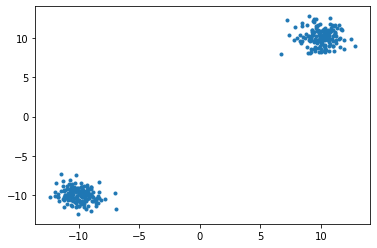

In [ ]:
plt.plot(x_train[:, 0], x_train[:, 1], '.')

In [ ]:
y_train.shape

(320,)

## **Training and Testing the Model**

### Linearly Seperable Hyperplane

In [48]:
# Support vector classifier 
from sklearn.svm import SVC  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [49]:
y_pred= classifier.predict(x_test)  

No handles with labels found to put in legend.


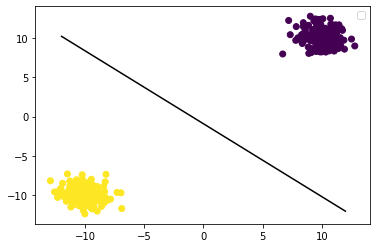

In [50]:
w = classifier.coef_[0]

# get the y-offset for the linear equation
a = -w[0] / w[1]

# make the x-axis space for the data points
XX = np.linspace(-12, 12)

# get the y-values to plot the decision boundary
yy = a * XX - classifier.intercept_[0] / w[1]

# plot the decision boundary
plt.plot(XX, yy, 'k-')

plt.scatter(x[:, 0], x[:, 1], c=y)
plt.legend()
plt.show()

### Accuracy

In [51]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print("Accuracy is: ",acc*100)

Accuracy is:  100.0


### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

In [ ]:
print("Confusion Matrix is:\n ", cm)

Confusion Matrix is:
  [[40  0]
 [ 0 40]]


# **Task-2**

## **Generating Samples**

In [ ]:
mu3      = [0,0]
sigma3   = [[1,0],[0,1]]
samples3 = np.random.multivariate_normal(mu3, sigma3, 200)

In [ ]:
samples3.shape

(200, 2)

In [ ]:
samples3[:5]

array([[ 0.10526991, -1.23453535],
       [-0.14692985,  1.64037507],
       [ 0.22006327,  0.87946437],
       [-0.64165133,  0.08684024],
       [ 0.01044366, -1.04331236]])

In [ ]:
df2_1 = pd.DataFrame(samples3, columns=['x2_1','x2_2'])
df2_1['y2'] = [1]*200
df2_1.head()

,x2_1,x2_2,y2
0,0.105270,-1.234535,1
1,-0.146930,1.640375,1
2,0.220063,0.879464,1
3,-0.641651,0.086840,1
4,0.010444,-1.043312,1


In [ ]:
mu4      = [1,1]
sigma4   = [[1,0],[0,1]]
samples4 = np.random.multivariate_normal(mu4, sigma4, 200)

In [ ]:
samples4.shape

(200, 2)

In [ ]:
samples4[:5]

array([[-0.87243509,  1.04312943],
       [ 1.60644631, -0.34369245],
       [ 1.13978111,  1.50063578],
       [-0.64424972,  1.78536278],
       [ 0.46915221,  0.51405706]])

In [ ]:
df2_2 = pd.DataFrame(samples4, columns=['x2_1','x2_2'])
df2_2['y2'] = [-1]*200
df2_2.head()

,x2_1,x2_2,y2
0,-0.872435,1.043129,-1
1,1.606446,-0.343692,-1
2,1.139781,1.500636,-1
3,-0.644250,1.785363,-1
4,0.469152,0.514057,-1


In [ ]:
df2 = pd.concat([df2_1,df2_2],axis=0).reset_index(drop=True)
df2

,x2_1,x2_2,y2
0,0.105270,-1.234535,1
1,-0.146930,1.640375,1
2,0.220063,0.879464,1
3,-0.641651,0.086840,1
4,0.010444,-1.043312,1
...,...,...,...
395,0.753960,1.155845,-1
396,0.646437,0.706507,-1
397,1.963071,1.467435,-1
398,3.378028,-0.526848,-1


## **Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split  
x_2 = df2[['x2_1','x2_2']] 
y_2 = df2['y2']  

x2_train, x2_test, y2_train, y2_test= train_test_split(x_2, y_2, test_size= 0.20, random_state=0, shuffle=True)  

In [ ]:
x2_train.shape

(320, 2)

In [ ]:
y2_train.shape

(320,)

## **Training and Testing the Model**

In [ ]:
from sklearn.svm import SVC  
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix  

### Linear Kernel


In [ ]:
linear = SVC(kernel='linear', random_state=0)  
linear.fit(x2_train, y2_train)


SVC(kernel='linear', random_state=0)

In [ ]:
y2_pred_linear = linear.predict(x2_test)  
acc_linear = accuracy_score(y2_test, y2_pred_linear)
print("Accuracy: ", acc_linear)
cm2_linear = confusion_matrix(y2_test, y2_pred_linear)  
print("Confusion Matrix:\n ",cm2_linear)

Accuracy:  0.775
Confusion Matrix:
  [[28  6]
 [12 34]]


### Polynomial Kernel 

In [ ]:
poly = SVC(kernel='poly')  
poly.fit(x2_train, y2_train)

SVC(kernel='poly')

In [ ]:
y2_pred_poly = poly.predict(x2_test)
acc_poly = accuracy_score(y2_test, y2_pred_poly)
print("Accuracy: ", acc_poly)
cm2_poly = confusion_matrix(y2_test, y2_pred_poly)  
print("Confusion Matrix:\n ",cm2_poly)

Accuracy:  0.8
Confusion Matrix:
  [[24 10]
 [ 6 40]]


### Radial-Basis Kernel

In [ ]:
rbf = SVC(kernel='rbf',gamma='auto')  
rbf.fit(x2_train, y2_train)

SVC(gamma='auto')

In [ ]:
y2_pred_rbf = rbf.predict(x2_test)
acc_rbf = accuracy_score(y2_test, y2_pred_rbf)
print("Accuracy: ", acc_rbf)
cm2_rbf = confusion_matrix(y2_test, y2_pred_rbf)  
print("Confusion Matrix:\n ",cm2_rbf)

Accuracy:  0.7625
Confusion Matrix:
  [[28  6]
 [13 33]]


### Chi-Squared Kernel

Since chi2-square doesnt apply to negative values, lets scale them using min-max scaler.

In [ ]:
from sklearn.metrics.pairwise import chi2_kernel
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x_2)

x2_train_chi2, x2_test_chi2, y2_train_chi2, y2_test_chi2= train_test_split(x_scaled, y_2, test_size= 0.20, random_state=0, shuffle=True)  


chi2 = SVC(kernel=chi2_kernel)
chi2.fit(x2_train_chi2, y2_train_chi2)


SVC(kernel=<function chi2_kernel at 0x7f7b217dc290>)

In [ ]:
y2_pred_chi2 = chi2.predict(x2_test_chi2)
acc_chi2 = accuracy_score(y2_test_chi2, y2_pred_chi2)
print("Accuracy: ", acc_chi2)
cm2_chi2 = confusion_matrix(y2_test_chi2, y2_pred_chi2)  
print("Confusion Matrix:\n ",cm2_chi2)

Accuracy:  0.7875
Confusion Matrix:
  [[29  5]
 [12 34]]


### Comparision of Accuracies

In [ ]:
data = {'Kernel':['Linear', 'Polynomial', 'Radial-Basis', 'Chi-Squared'],
        'Accuracy in %':[acc_linear*100, acc_poly*100 ,acc_rbf*100 , acc_chi2*100],
        'Confusion Matrix':[cm2_linear, cm2_poly ,cm2_rbf , cm2_chi2]}
df = pd.DataFrame(data)

In [ ]:
df

,Kernel,Accuracy in %,Confusion Matrix
0,Linear,77.50,"[[28, 6], [12, 34]]"
1,Polynomial,80.00,"[[24, 10], [6, 40]]"
2,Radial-Basis,76.25,"[[28, 6], [13, 33]]"
3,Chi-Squared,78.75,"[[29, 5], [12, 34]]"
